In [1]:
import os
import numpy as np
import librosa
import librosa.display
import speech_recognition as sr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from pydub import AudioSegment

In [2]:
icg_dataset_folder = "./data/ICG_dataset/"

Function to draw the signal of a specified file

In [3]:
def draw_waveform(file_path):
    y, sr = librosa.load(file_path)
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of {}'.format(file_path))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

Function to draw the MFCC heat map of a specified file

In [4]:
def draw_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC of {}'.format(file_path))
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

Function to plot a histogram of the length of each file

In [5]:
def plot_length_histogram(folder_path, interval_seconds=5, remove_broken_files=False):
    lengths = []
    wav_count = 0

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith('.wav'):
                file_path = os.path.join(root, filename)
                y, sr = librosa.load(file_path)
                length_seconds = len(y) / sr
                lengths.append(length_seconds)
                wav_count += 1

    # Check if the lengths list is not empty
    if lengths:
        # Plot histogram
        plt.figure(figsize=(10, 6))
        plt.hist(lengths, bins=np.arange(0, max(lengths) + interval_seconds, interval_seconds), edgecolor='black')
        plt.title('Histogram of File Lengths')
        plt.xlabel('Length (seconds)')
        plt.ylabel('Count')

        # Show mean and standard deviation
        mean_length = np.mean(lengths)
        std_length = np.std(lengths)
        plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f} s')

        plt.legend()
        plt.show()
        print('There are ' + str(wav_count) + 'files in the dataset')
        avg_length = round(sum(lengths) / wav_count, 2)
        print('Average length is ' + str(avg_length) + ' second')
        print('Max length is ' + str(max(lengths)) + ' second')
    else:
        print("No valid .wav files found in the specified folder.")

In [6]:
specific_file_path = os.path.join(icg_dataset_folder, "0114/G001ID0038CH038154730D000KRE0.wav")

1. Draw the signal of a specific file

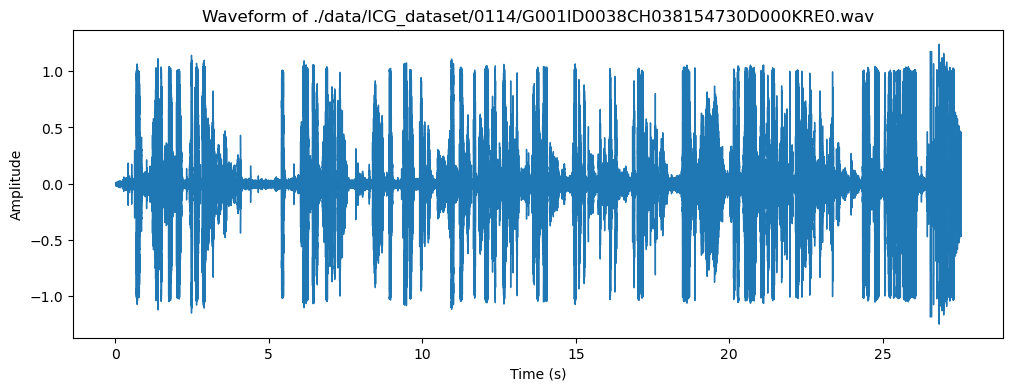

In [7]:
draw_waveform(specific_file_path)

2. Draw the MFCC heat map of a specific file

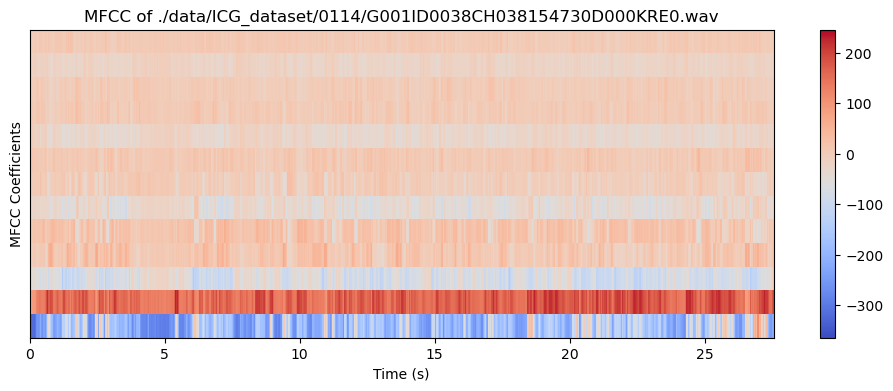

In [8]:
draw_mfcc(specific_file_path)

3. Plot a histogram of the length of each file

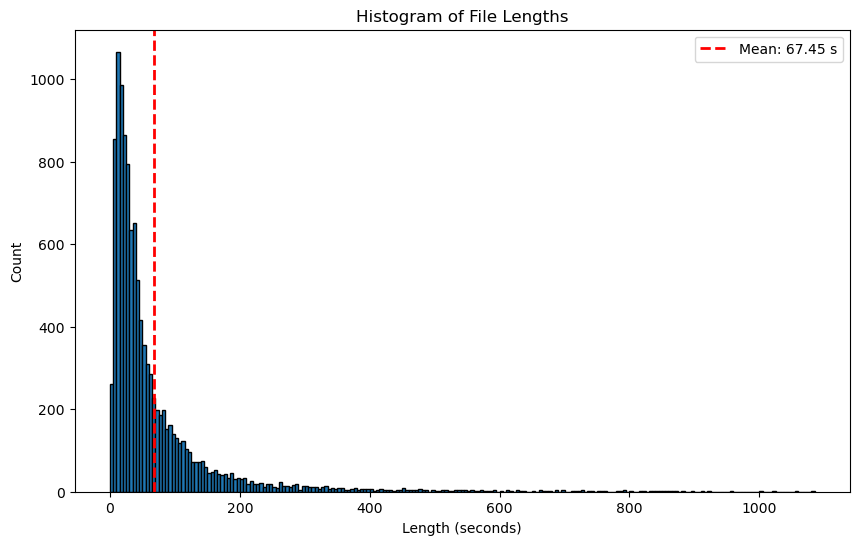

There are 11299files in the dataset
Average length is 67.45 second
Max length is 1081.5680272108843 second


In [9]:
lengths = plot_length_histogram(icg_dataset_folder,  remove_broken_files=True)